## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Read DataSet

In [4]:
path = "..\Data\covid19_Confirmed_dataset.csv"
corona_dataset_csv = pd.read_csv(path)
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


# PreProcessing & Data Manipulation

In [5]:
corona_dataset_csv.shape
#This dataset consist of 266 rows and 104 features

(266, 104)

In [6]:
columns = corona_dataset_csv.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

Latitude and Longitude are not important features for us here

In [7]:
corona_dataset_csv.drop(["Lat","Long"],axis=1, inplace = True)

In [8]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


Aggregating the rows by the country

In [9]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [10]:
corona_dataset_aggregated.drop("Province/State", axis = 1, inplace= True)
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [42]:
corona_dataset_aggregated.shape
#we have 187 countries, 100 dates

(187, 101)

## Visualizing data related to a country for example China

In [11]:
corona_dataset_aggregated.loc["China"]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

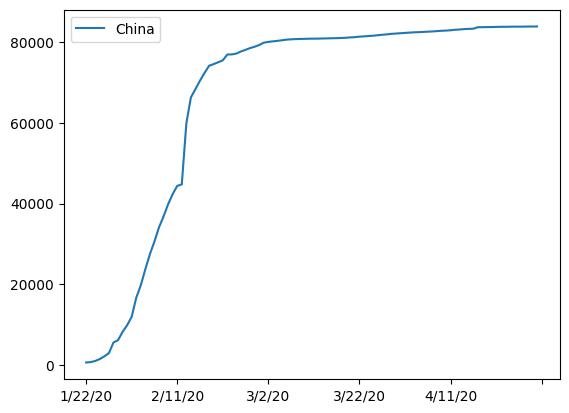

In [12]:
corona_dataset_aggregated.loc['China'].plot()
plt.legend()

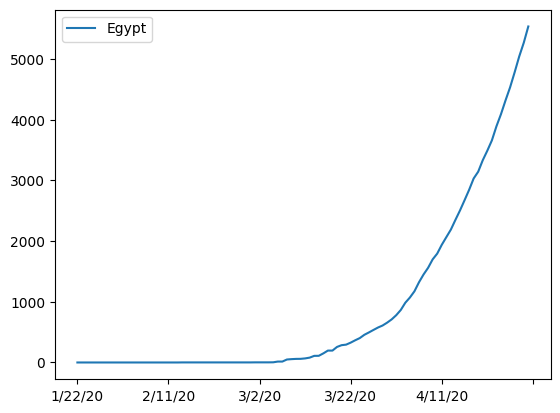

In [13]:
corona_dataset_aggregated.loc['Egypt'].plot()
plt.legend()

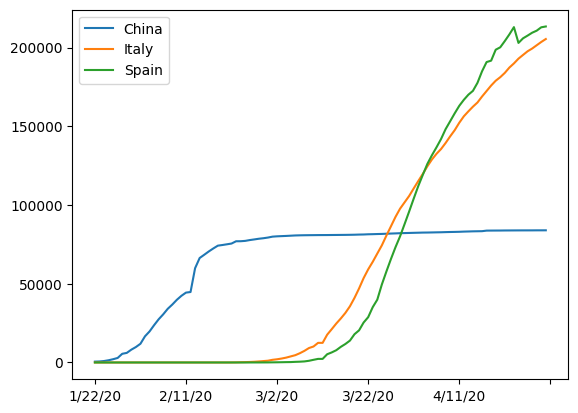

In [14]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

By focusing on this figure, we can find out that, China has a rapid increase in cases early on, followed by a plateau, indicating early control measures also, about Italy and Spain: Sharp increases in cases during the initial outbreak, with Italy showing an earlier surge than Spain.

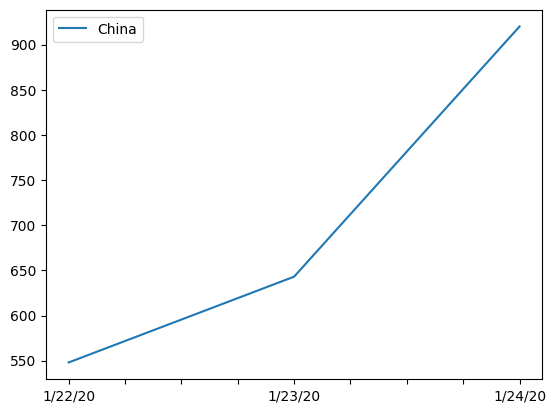

In [15]:
corona_dataset_aggregated.loc['China'][:3].plot()
plt.legend()

The initial mild increase (from 1/22/20 to 1/23/20) suggests a slower rate of transmission. This could be attributed to the outbreak's early stages, when the virus had not yet spread widely, or to the first public health initiatives, which had a temporary effect.
The ensuing steep increase (from 1/23/20 to 1/24/20) implies a higher transmission rate, implying that the virus spread more quickly within the population. This quick rise could be attributable to various sources, including but not limited to:

-- Increased Viral Spread: The virus may have spread to more densely populated areas or conditions that allow for rapid transmission (for example, crowded locations).

-- Reporting Lag: It is possible that there was a delay in reporting cases, which resulted in an apparent surge when further data became accessible.

-- Increased Testing: A larger reported number of cases may have been found through more thorough testing.

-- Behavioral Factors: A shift in the way people behaved (such as a disregard for social distance) may have aided in the disease's quicker spread.

### caculating the first derivative of the curve

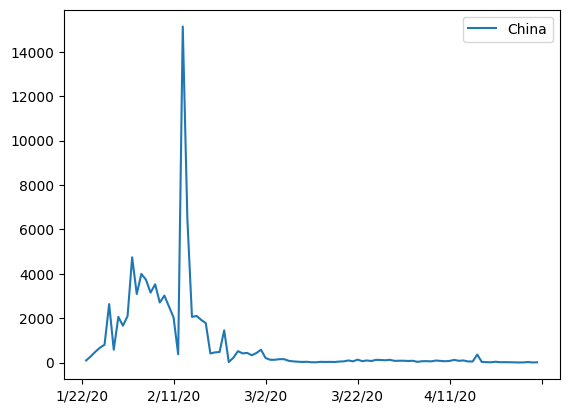

In [16]:
corona_dataset_aggregated.loc["China"].diff().plot()
plt.legend()
#This plot shows us the change in infection rate day by day and what we are looking for is the maximum number.

## find maxmimum infection rate for China

In [17]:
corona_dataset_aggregated.loc["China"].diff().max()
#In only 24 hrs, the difference was 15136

np.float64(15136.0)

In [18]:
corona_dataset_aggregated.loc["Italy"].diff().max()
#In only 24 hrs, the difference was 6557

np.float64(6557.0)

In [19]:
corona_dataset_aggregated.loc["Spain"].diff().max()
#In only 24 hrs, the difference was 9630

np.float64(9630.0)

## find maximum infection rate for all of the countries

In [20]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
max_infection_rates

[np.float64(232.0),
 np.float64(34.0),
 np.float64(199.0),
 np.float64(43.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(291.0),
 np.float64(134.0),
 np.float64(497.0),
 np.float64(1321.0),
 np.float64(105.0),
 np.float64(7.0),
 np.float64(301.0),
 np.float64(641.0),
 np.float64(12.0),
 np.float64(1485.0),
 np.float64(2454.0),
 np.float64(4.0),
 np.float64(19.0),
 np.float64(1.0),
 np.float64(104.0),
 np.float64(92.0),
 np.float64(7.0),
 np.float64(7502.0),
 np.float64(26.0),
 np.float64(137.0),
 np.float64(41.0),
 np.float64(21.0),
 np.float64(6.0),
 np.float64(45.0),
 np.float64(31.0),
 np.float64(203.0),
 np.float64(2778.0),
 np.float64(31.0),
 np.float64(21.0),
 np.float64(1138.0),
 np.float64(15136.0),
 np.float64(353.0),
 np.float64(1.0),
 np.float64(57.0),
 np.float64(81.0),
 np.float64(37.0),
 np.float64(113.0),
 np.float64(96.0),
 np.float64(63.0),
 np.float64(58.0),
 np.float64(381.0),
 np.float64(391.0),
 np.float64(99.0),
 np.float64(156.0),
 np.float64(5.0),
 np.float

In [21]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [22]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [23]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [24]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


create a new dataframe with only needed column

In [25]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Importing the WorldHappinessReport.csv
selecting necessary columns for our analysis join the datasets calculate the correlations as the result of our analysis

In [27]:
path_1 = "..\Data\worldwide_happiness_report.csv"
happiness_report_csv = pd.read_csv(path_1)
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Drop Useless Columns

In [28]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


changing the indices of the dataframe

In [29]:
happiness_report_csv.set_index("Country or region", inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


join two dataset we have prepared Corona Dataset.

In [30]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [31]:
corona_data.shape

(187, 1)

wolrd happiness report Dataset

In [32]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [33]:
happiness_report_csv.shape

(156, 4)

# Inner Join

In [34]:
data = corona_data.join(happiness_report_csv, how = "inner")
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


# correlation matrix

In [35]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


-- GDP per Capita: A scatter plot and regression analysis were performed to examine the relationship between GDP per capita and maximum infection rates. The results indicated a complex relationship, suggesting that wealthier countries did not necessarily experience lower maximum infection rates.

-- Social Support: Analysis revealed that countries with higher social support scores tended to have varied infection rates, implying that social structures may influence the spread and reporting of the virus.

-- Healthy Life Expectancy: Countries with higher healthy life expectancy showed a mixed correlation with infection rates, suggesting that general health conditions and healthcare quality might play roles in COVID-19 dynamics.

-- Freedom to Make Life Choices: The freedom to make life choices showed some correlation with infection rates, indicating that individual behaviors and government policies could impact the spread of COVID-19.

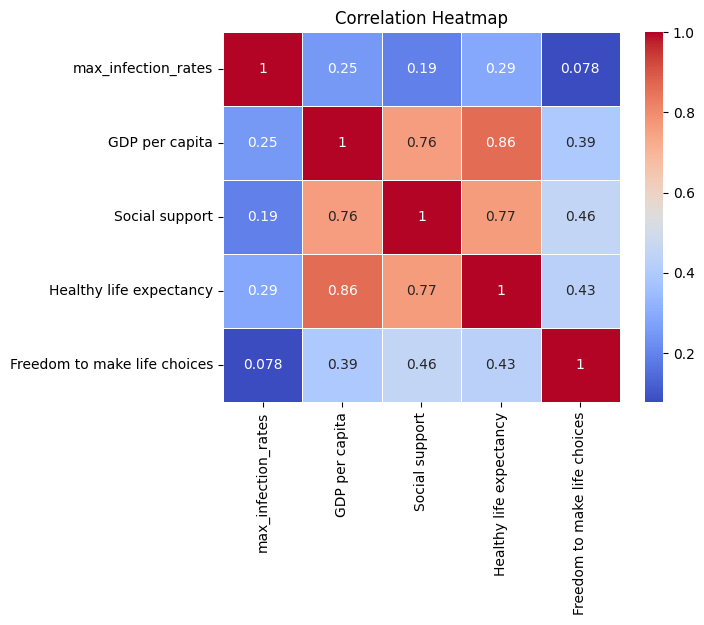

In [36]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

The heatmap visualizes the correlation matrix, showing the relationships between different variables. Key observations include:
-- GDP per capita, social support, healthy life expectancy, and freedom to make life choices show varying degrees of correlation with maximum infection rates.
-- Some socioeconomic factors may have slight correlations with infection rates, but no strong predictors are evident.

# Visualize the result

In [37]:
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


# Plotting GDP vs maximum Infection rate

<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

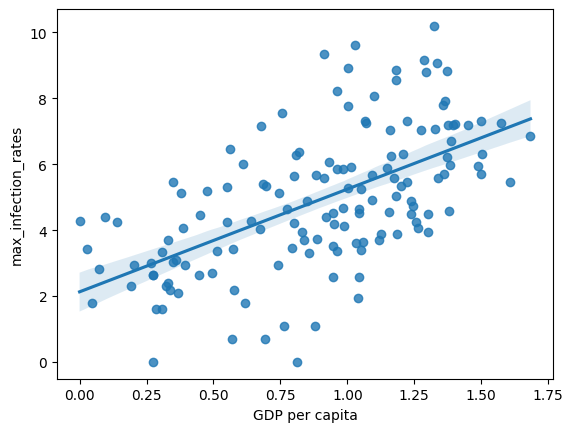

In [38]:
x = data["GDP per capita"]
y = data["max_infection_rates"]
sns.regplot(x=x,y=np.log(y))

Countries with varying GDP per capita show a wide range of infection rates, indicating other factors at play. A slight negative trend, suggests that higher GDP per capita might be associated with lower maximum infection rates, but the relationship is not strong.

# Plotting Social support vs maximum Infection rate

<Axes: xlabel='Social support', ylabel='max_infection_rates'>

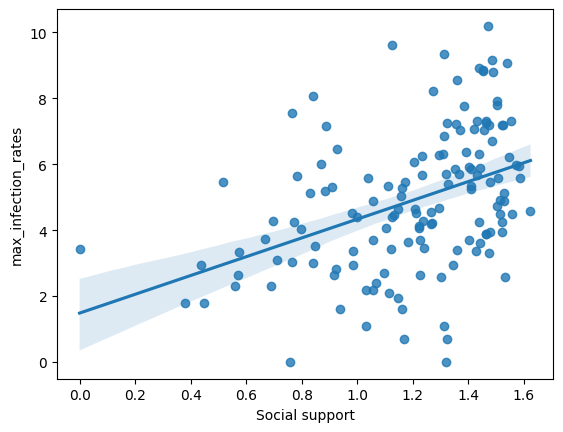

In [39]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

Varied infection rates across different levels of social support indicate a complex relationship. No strong correlation, suggesting that social support alone does not predict maximum infection rates effectively.

# Plotting Freedom to make life choices vs maximum Infection rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

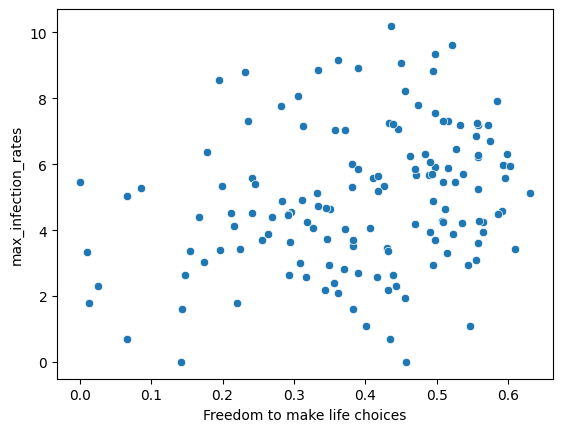

In [41]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

Varied infection rates suggest a complex relationship between individual freedoms and virus spread. No strong correlation, suggesting that individual freedoms alone do not predict infection rates effectively.

In [ ]:
!pip list